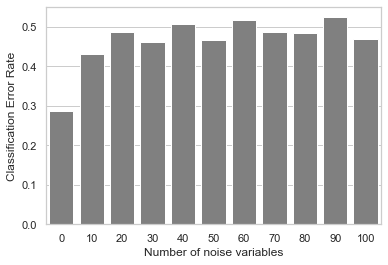

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

# a)
def sample_mixture(n, M):
    """Returns a sample of size n from a Gaussian mixture distribution that is the sum of 10 normal distributions with
    means M and identical variance 0.1.
    """    
    mean_sample = np.random.choice(M, replace=True, size=n)
    mixture_sample = np.concatenate([norm.rvs(loc=mu, scale=0.1, size=1) for mu in mean_sample])
    return(mixture_sample)

# Generate means for the mixture distributions
# Means for y = 0
x1_0_mean = uniform.rvs(size=10)
x2_0_mean = uniform.rvs(size=10)

# Means for y = 0
x1_1_mean = uniform.rvs(size=10)
x2_1_mean = uniform.rvs(size=10)

df = pd.DataFrame({'y': np.repeat(0, 500), 'x1': sample_mixture(500, x1_0_mean), 'x2': sample_mixture(500, x2_0_mean)})
df = df.append(pd.DataFrame({'y': np.repeat(1, 500), 'x1': sample_mixture(500, x1_1_mean), 'x2': sample_mixture(500, x2_1_mean)}))

# Generate noise variables
for k in range(1, 101):
    df['z%d' % k] = pd.Series(uniform.rvs(size=1000))

    
# Split data into training and test data
msk = np.random.choice(len(df.index), size=500, replace=False)
train = df.iloc[msk]
test = df.iloc[~msk]


# b) 
def calculate_error(n):
    """Calculate prediction error using k nearest neighbours with n additional noise variables.
    """
    x = ['x1', 'x2'] + ['z%d' % i for i in range(1, n + 1)]
    
    nbrs = KNeighborsClassifier(n_neighbors=15).fit(X=train[x], y=train['y'])
    
    prediction = nbrs.predict(test[x])
    
    return(1 - accuracy_score(test['y'], prediction))


# c) Plot prediction error against number of noise variables included
sns.set_theme(style="whitegrid")
plot = sns.barplot(
    x=[n for n in range(0, 101, 10)],
    y=[calculate_error(n) for n in range(0, 101, 10)],
    color='grey'
    ).set(
    xlabel='Number of noise variables',
    ylabel='Classification Error Rate'
)
plt.savefig("Q 7.7 plot.png")
